# Etapa de pré-processamento dos dados

## Importação das libs

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Base de dados do crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

Dicionário de dados:
- ClientId -> Identificador único do cliente
- Income -> Reda do cliente em reais
- Age -> Idade do cliente
- Loan -> Valor do empréstimo
- Default -> 0 se pagou o empréstimo, 1 se não pagou o empréstimo

### Exploração dos dados

In [2]:
# Importação dos dados
base_credit = pd.read_csv('./data/01.credit_data.csv')

In [3]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [4]:
# Ver os 10 primeiros
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [5]:
# Ver os 8 últimos
base_credit.tail(8)

,clientid,income,age,loan,default
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [6]:
# Descrição dos dados
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [7]:
# Filtrando os clientes com sálario maior ou igual a média 
base_credit[base_credit['income'] >= base_credit['income'].mean()]

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
2,3,57317.170063,63.108049,8020.953296,0
4,5,66952.688845,18.584336,8770.099235,1
6,7,48430.359613,26.809132,5722.581981,0
10,11,64131.415372,25.679575,4351.028971,0
...,...,...,...,...,...
1987,1988,49640.004702,20.542409,5760.858734,0
1993,1994,54421.410155,26.821928,3273.631823,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0


In [8]:
# Filtrando os clientes com sálario menor que a média 
base_credit[base_credit['loan'] < base_credit['income'].mean()]

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


### Visualização dos dados

In [9]:
# Distribuição de valores unicos - opção 1
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

In [10]:
# Distribuição de valores unicos - opção 2
base_credit['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

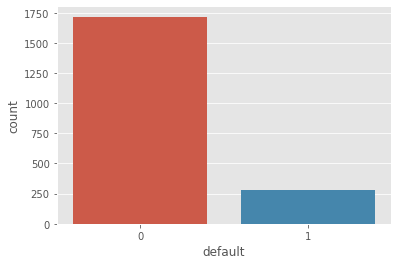

In [11]:
# Distribuição de classes
sns.countplot(x = base_credit['default']);

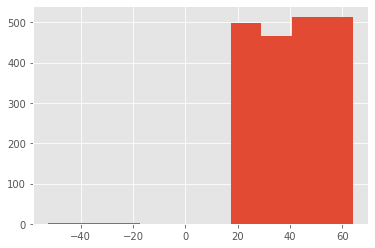

In [12]:
# Histograma da idade dos clientes
plt.hist(x = base_credit['age']);

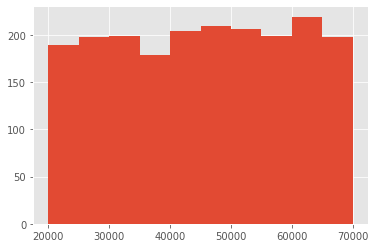

In [13]:
# Histograma dos slarios dos clientes
plt.hist(x = base_credit['income']);

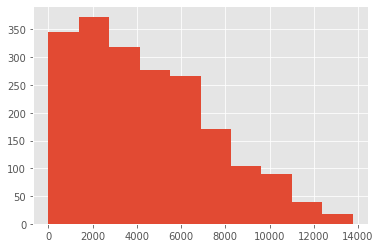

In [14]:
# Histograma dos valores de empréstimos
plt.hist(x = base_credit['loan']);

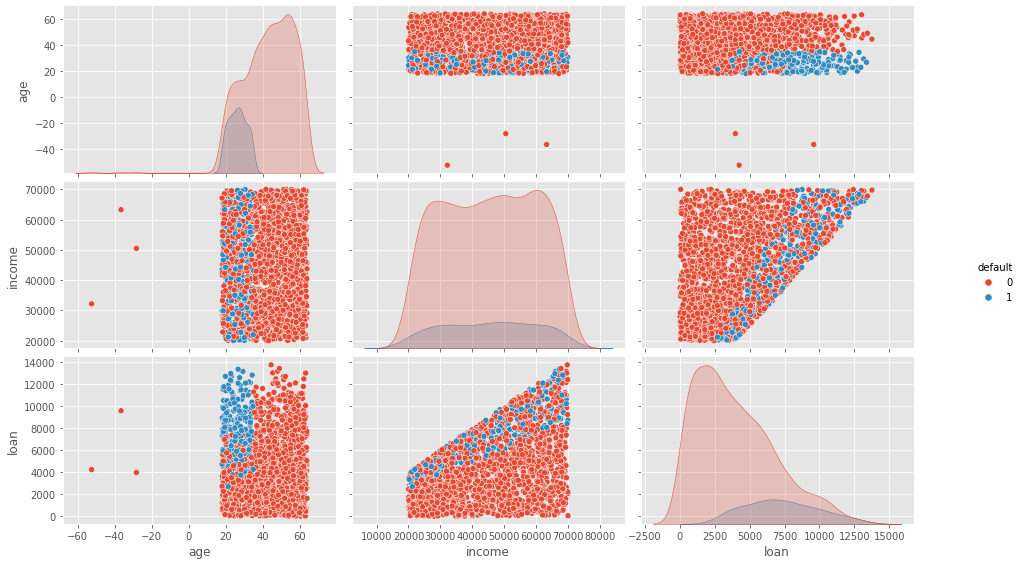

In [15]:
ax = sns.pairplot(base_credit[['age', 'income', 'loan', 'default']], hue="default");
ax.fig.set_size_inches(15,8)

### Tratamento de valores inconsistentes

In [16]:
# Filtrando os valores de idade menor que 0 - opção 1
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [17]:
# Filtrando os valores de idade menor que 0 - opção 2
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [18]:
# Apagar a coluna inteira (de todos os registros da base de dados) - axis = 1
base_credit.drop(columns='age', axis = 1)

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [19]:
# Index da base dados
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [20]:
# Index das idades menor que 0
base_credit[base_credit['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [21]:
# Apagar somente os registros com valores inconsistentes - opção 1
base_credit2 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit2

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [22]:
base_credit2.loc[base_credit2['age'] < 0]

,clientid,income,age,loan,default


In [23]:
# Médias das features
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [24]:
# Média das idades com os valores inconsistentes
base_credit['age'].mean()

40.80755937840458

In [25]:
# Média das idades tirando os valores inconsistentes
base_credit[base_credit['age'] > 0]['age'].mean()

40.92770044906149

In [26]:
# Substituindo os valores incosistentes pela média - opção 2
base_credit.loc[base_credit['age'] < 0, 'age'] = base_credit[base_credit['age'] > 0]['age'].mean()
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


### Tratamento de valores faltantes

In [27]:
# Verificando valores null
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [28]:
# Verificando a quantidade de valores null por feature
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [29]:
# Filtrando pelos valores null
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [30]:
# Substituindo os valores inconsistentes pela média da feature - inplace = true realiza a substituição direto
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [31]:
# Filtrando os clientes que possuem os identificadores únicos 29, 31, 32 - opção 1
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31) | (base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [32]:
# Filtrando os clientes que possuem os identificadores únicos 29, 31, 32 - opção 2
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


### Divisão entre previsores e classe

In [33]:
# Filtrando os valores das colunas income, age, loan
# Index: 0 - clientid; 1 - income; 2 - age; 3 - loan; 4 - default.
# Em 1:4 -> 4 não está incluso na listagem indo de 1 a 3
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [34]:
type(X_credit)

numpy.ndarray

In [35]:
# Filtrando os valores da coluna 4 - default
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
type(y_credit)

numpy.ndarray

### Divisão de treino e teste

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Separação de treino e teste, 75% e 25% respectivamente com randomização de estado 0
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

### Escalonamento dos valores

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# Valor minimo de cada feature do X_train_credit (income, age, loan)
X_train_credit[:,0].min(), X_train_credit[:,1].min(), X_train_credit[:,2].min()

(20063.0995840766, 18.055874488782106, 1.37762959325451)

In [41]:
# Valor máximo de cada feature do X_train_credit (income, age, loan)
X_train_credit[:,0].max(), X_train_credit[:,1].max(), X_train_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [42]:
# Iniciando o StandardScaler, treinando e transformando os dados X_train_credit
scaler_credit = StandardScaler()
X_train_credit_scaler = scaler_credit.fit_transform(X_train_credit)
X_train_credit_scaler

array([[-1.38977008,  0.51327405,  0.09505576],
       [ 1.44720202, -1.66082919, -1.22989188],
       [-0.80722238,  0.22981706, -0.44850643],
       ...,
       [ 0.20489201, -0.14579608,  1.39409233],
       [ 0.57509718,  0.6727006 ,  0.66478032],
       [ 0.67119929,  0.04374102,  1.90361221]])

In [43]:
# Valor minimo de cada feature do X_train_credit com StandardScaler (income, age, loan)
X_train_credit_scaler[:,0].min(), X_train_credit_scaler[:,1].min(), X_train_credit_scaler[:,2].min()

(-1.7789932772010548, -1.738929914724156, -1.474178762557068)

In [44]:
# Valor máximo de cada feature do X_train_credit com StandardScaler (income, age, loan)
X_train_credit_scaler[:,0].max(), X_train_credit_scaler[:,1].max(), X_train_credit_scaler[:,2].max()

(1.7112637704045024, 1.7571167538024692, 3.0471821434819866)

In [45]:
# Transformando os valores de teste
X_test_credit_scaler = scaler_credit.transform(X_test_credit)
X_test_credit_scaler

array([[ 1.5821087 , -1.3636715 ,  2.56810396],
       [ 0.98610533,  1.00933054,  0.82950188],
       [-0.43808225,  0.56554266, -1.17272445],
       ...,
       [ 1.3632982 , -1.06417876, -1.14051678],
       [-1.5854262 , -0.63790114, -0.38461493],
       [-1.04965576, -0.94546774,  0.02768328]])

### Salvando os dados

In [46]:
import pickle

In [47]:
with open('./data/credit.pkl', mode = 'wb') as f:
    pickle.dump([X_train_credit_scaler, y_train_credit, X_test_credit_scaler, y_test_credit], f)

In [48]:
# Limpando as variáveis criadas
del base_credit, X_credit, y_credit
del X_train_credit, X_test_credit, y_train_credit, y_test_credit
del X_train_credit_scaler, X_test_credit_scaler

-------------------------------------------------------------------------------------------------------

-------------

## Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

Dicionário de dados:
- Age: Idade da pessoa
- Workclass: Classe de trabalho, privada, gorverno...
- Peso: -
- Education: Nível de educação da população
- Education-num: -
- Marital-status: -
- Occupation: Ocupação da pessoa
- Relationship: Estado civil
- Race: cor
- Sex: sexo da pessoa
- Capital-gain: -
- Capital-loss: -
- Hour-per-week: Horas trabalhadas por semana
- Native-country: Pais
- Income: Se maior ou menor que 50k

### Exploração dos dados

In [49]:
# Importando os dados
base_census = pd.read_csv('./data/02.census_data.csv')

In [50]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [51]:
base_census.shape

(32561, 15)

In [52]:
# Descrição dos dados
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [53]:
# Verificando a quantidade de dados null
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Visualização dos dados

In [54]:
# Distribuição de valores unicos da renda - opção 1
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [55]:
# Distribuição de valores unicos da renda - opção 2
base_census['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

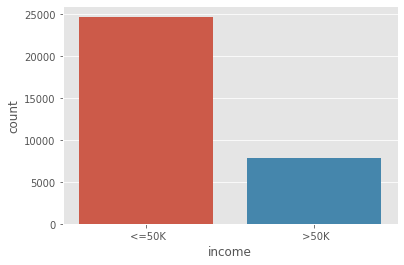

In [56]:
# Distribuição de renda
sns.countplot(x = base_census['income']);

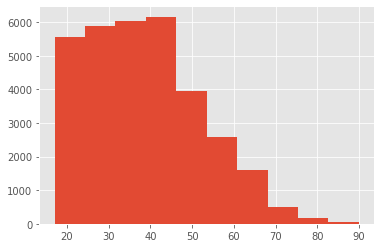

In [57]:
# Histograma da idade
plt.hist(x = base_census['age']);

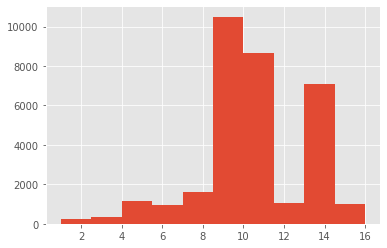

In [58]:
# Histograma do numero de educação
plt.hist(x = base_census['education-num']);

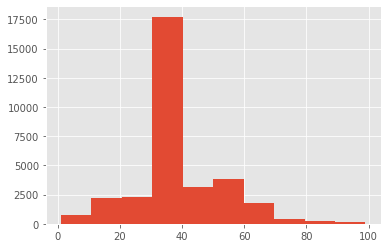

In [59]:
# Histograma das horas por semana
plt.hist(x = base_census['hour-per-week']);

### Divisão entre previsores e classe

In [60]:
# Todas as colunas da base de dados
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [61]:
# Filtrando todos os valores de features
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [62]:
# Filtra a label da base de dados
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Tratamento de atributos categóricos

#### LabelEncoder

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [65]:
LabelEncoder().fit_transform(X_census[:,1])

array([7, 6, 4, ..., 4, 4, 5])

In [66]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [67]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [68]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

#### OneHotEncoder

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [70]:
# Exemplo 
# LabelEncoder - Substitui string em número inteiro
# Gol Pálio Uno ->  1  2  3

# OneHotEncoder - Se tipo categorico inteiro não possui ordem, deve ser transformado em coluna binária
# Gol   -> 1 0 0
# Pálio -> 0 1 0
# Uno   -> 0 0 1 

In [71]:
# Transformar em coluna os valores transformados do modelo OneHotEncoder para as colunas 1, 3, 5...
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [72]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [73]:
X_census.shape

(32561, 108)

### Divisão de treino e teste

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Separando a base de dados do census em treino e teste, 75% e 25% respectivamente, com randomização de estado igual a 0
X_train_census, X_test_census, y_train_census, y_test_census = train_test_split(X_census, y_census, test_size = 0.25, random_state = 0)

In [76]:
X_train_census.shape

(24420, 108)

In [77]:
X_test_census.shape

(8141, 108)

### Escalonamento dos valores

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
# Inicnando o StandardScaler, treinando e transformando o X_train_cemsus
scaler_census = StandardScaler()
X_train_census_scaler = scaler_census.fit_transform(X_train_census)
X_train_census_scaler

array([[-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621, -0.44509689],
       [-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621, -1.66848877],
       [-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621, -0.03729959],
       ...,
       [-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621, -0.03729959],
       [-0.24322892, -0.17516897,  3.79564752, ...,  0.89747778,
        -0.21558621,  0.3704977 ],
       [-0.24322892, -0.17516897, -0.26345966, ...,  0.20664405,
        -0.21558621,  0.61517608]])

In [80]:
# Transformando o valores de X_test_census
X_test_census_scaler = scaler_census.transform(X_test_census)
X_test_census_scaler

array([[-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621,  0.28893824],
       [-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621, -0.03729959],
       [-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621, -0.03729959],
       ...,
       [-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621, -0.03729959],
       [-0.24322892, -0.17516897, -0.26345966, ..., -0.14576122,
        -0.21558621,  0.778295  ],
       [-0.24322892, -0.17516897,  3.79564752, ..., -0.14576122,
        -0.21558621, -0.20041851]])

### Salvando os dados

In [81]:
import pickle

In [82]:
with open('./data/census.pkl', mode = 'wb') as f:
    pickle.dump([X_train_census_scaler, y_train_census, X_test_census_scaler, y_test_census], f)

In [83]:
del base_census, X_census, y_census
del X_train_census, X_test_census, y_train_census, y_test_census
del X_train_census_scaler, X_test_census_scaler